# Business Understanding

## Objective


## Description

In [59]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

## Import Libraries

In [60]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modeling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualization
#matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6


## Setup helper Functions

There is no need to understand to this code.

In [61]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure( figsize=(16, 12) )
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[ var_name ].hist(bins=10, ax=ax)
        ax.set_title('Skew: ' + str( round( float( df[ var_name].skew()), )))
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
    fig.tight_layout()
    plt.show()

def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()

def plot_categories(df, cat, target, **kwargs):
    row=kwargs.get('row', None)
    col=kwargs.get('col', None)
    facet=sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()
    
def plot_correlation_map(df):
    corr = titanic.corr()
    _, ax = plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink' : .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize' : 12}
    )
    
def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state=99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)

def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame(
        model.feature_importances_,
        columns = ['Importance'],
        index = X.columns
    )
    imp = imp.sort_values(['Importance'], ascending=True)
    imp[:10].plot(kind='barh')
    print(model.score(X,y))
    
def describe_more(db):
    var = []; l = []; t = []
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable' : var, 'Levels' : 1, 'Datatype':t})
    levels.sort_values(by='Levels', inplace=True)
    return levels

## Load Data

In [62]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
print('train:', train.shape, 'test:', test.shape)

train: (891, 12) test: (418, 11)


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:

full = train.append(test, ignore_index = True, sort=True)
titanic = full[:891]
del train, test
print('Datasets:', 'full:', full.shape, 'titanic:', titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [65]:
## Statistical summaries and visualizations

In [66]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Look at some key information about the variables

In [67]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


### A heat map of correlation

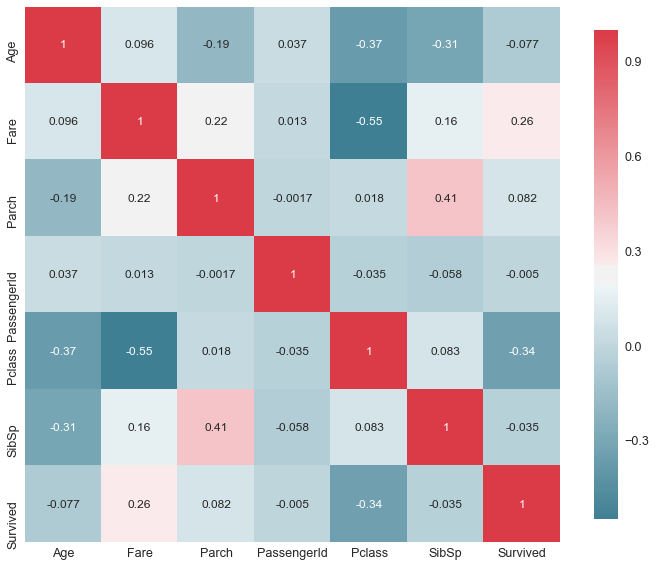

In [68]:
plot_correlation_map(titanic)

### Explore the relationship between the features and survival of passengers

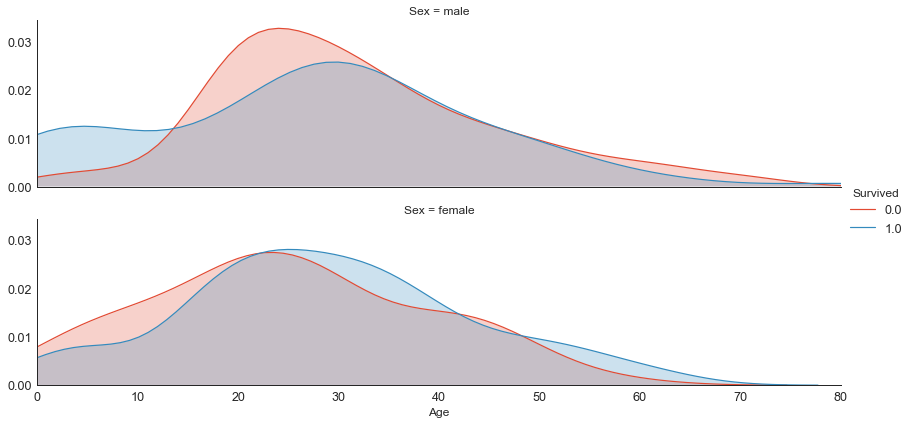

In [69]:
plot_distribution(titanic, var='Age', target='Survived', row='Sex')

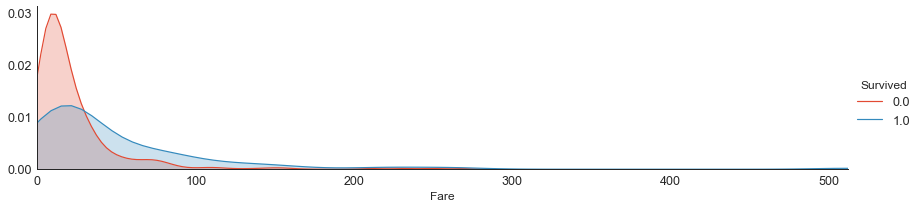

In [70]:
plot_distribution(titanic, var='Fare', target='Survived')

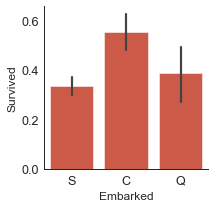

In [71]:
plot_categories(titanic, cat='Embarked', target='Survived')

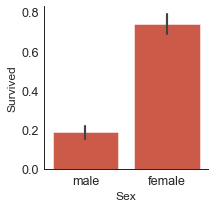

In [72]:
plot_categories(titanic, cat='Sex', target='Survived')

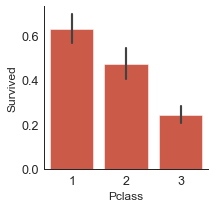

In [73]:
plot_categories(titanic, cat='Pclass', target='Survived')

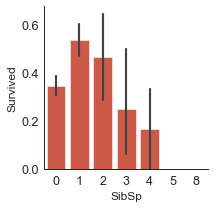

In [74]:
plot_categories(titanic, cat='SibSp', target='Survived')

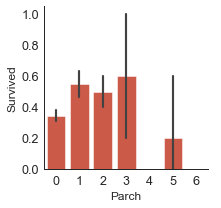

In [75]:
plot_categories(titanic, cat='Parch', target='Survived')

# 准备数据

## 将分类标签变量转换为数值

变量Embarded，PClass和Sex都被定义为了分类变量， 

In [76]:
sex  = pd.Series(np.where(full.Sex == 'male', 1, 0), name = 'Sex')

In [77]:
embarked = pd.get_dummies(full.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [78]:
pclass = pd.get_dummies(full.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## 填充缺失值

In [79]:
imputed = pd.DataFrame()
imputed['Age'] = full.Age.fillna(full.Age.mean())
imputed['Fare'] = full.Fare.fillna(full.Fare.mean())
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## 特征工程

### 从姓名提取乘客的title

In [80]:
title = pd.DataFrame()
title['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
title['Title']  = title.Title.map(Title_Dictionary)
title=pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [81]:
cabin = pd.DataFrame()
cabin['Cabin'] = full.Cabin.fillna('U')
cabin.head()

,Cabin
0,U
1,C85
2,U
3,C123
4,U


In [82]:
cabin['Cabin'] = cabin['Cabin'].map(lambda c:c[0])
cabin = pd.get_dummies(cabin['Cabin'], prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [83]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [84]:
ticket = pd.DataFrame()
ticket['Ticket'] = full['Ticket'].map(cleanTicket)
ticket = pd.get_dummies(ticket['Ticket'], prefix='Ticket')

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
family = pd.DataFrame()
family['FamilySize'] = full['Parch'] + full['SibSp'] + 1
family['Family_Single'] = family['FamilySize'].map(lambda s : 1 if s == 1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
family['Family_Large'] = family['FamilySize'].map(lambda s : 1 if 5 <= s else 0)
family.head()



,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [86]:
full_X = pd.concat([imputed, embarked, cabin, sex], axis=1)
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [87]:
train_valid_X = full_X[:891]
train_valid_y = titanic.Survived
test_X = full_X[891:]
train_X, valid_X, train_y, valid_y = train_test_split(train_valid_X, train_valid_y, train_size = .7)
print (full_X.shape, train_X.shape, valid_X.shape, train_y.shape, valid_y.shape, test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (418, 15)


0.9903691813804173


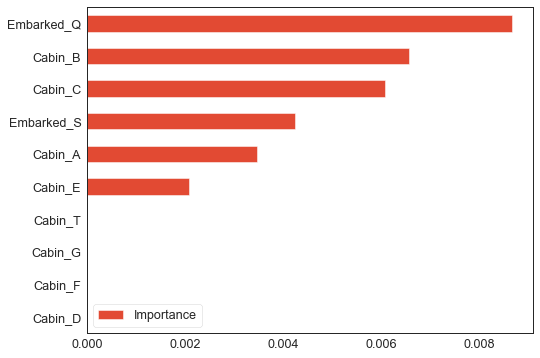

In [88]:
plot_variable_importance(train_X, train_y)